In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bar_chart_race as bcr

In [2]:
df_full = pd.read_csv('data/tweets_users_jun_21.csv', parse_dates=['date'])
df_user = pd.read_csv('data/user_data.csv')

In [3]:
df_full['year'] = df_full['date'].dt.year
df_full['month'] = df_full['date'].dt.month
df_full['day'] = df_full['date'].dt.day

In [4]:
df_full.shape

(2452, 38)

In [5]:
df_full.head().T

,0,1,2,3,4
url_x,https://twitter.com/PodRevDay/status/140297404...,https://twitter.com/realnealveglio/status/1402...,https://twitter.com/talkin_shiz/status/1402953...,https://twitter.com/WomenOnMic/status/14027447...,https://twitter.com/LsceP/status/1402734266597...
date,2021-06-10 13:00:52+00:00,2021-06-10 12:15:25+00:00,2021-06-10 11:41:01+00:00,2021-06-09 21:49:56+00:00,2021-06-09 21:08:05+00:00
content,Thanks to @amarksteadman for the #podrevday me...,"@JamesBurtt @Podchaser Keep it up, Mr Burtt! @...",If you looking for a great podcast check us ou...,Huge thank you to @stephfuccio for sharing the...,A little belated for #PodRevDay but Check out ...
renderedContent,Thanks to @amarksteadman for the #podrevday me...,"@JamesBurtt @Podchaser Keep it up, Mr Burtt! @...",If you looking for a great podcast check us ou...,Huge thank you to @stephfuccio for sharing the...,A little belated for #PodRevDay but Check out ...
id_x,1402974042685153281,1402962603358498829,1402953946050842628,1402744798650376193,1402734266597974018
user,"{'username': 'PodRevDay', 'displayname': 'Podc...","{'username': 'realnealveglio', 'displayname': ...","{'username': 'talkin_shiz', 'displayname': 'Ta...","{'username': 'WomenOnMic', 'displayname': 'Wom...","{'username': 'LsceP', 'displayname': 'I Saw It..."
outlinks,[],[],['https://www.podchaser.com/podcasts/talkin-sh...,[],['https://www.podchaser.com/podcasts/dads-on-d...
tcooutlinks,[],[],['https://t.co/xbbHiiYmJF'],[],['https://t.co/3pnbdGms2O']
replyCount,0,0,0,2,0
retweetCount,2,0,0,4,0


In [6]:
df_full.shape

(2452, 38)

In [7]:
df_full = df_full.drop_duplicates()

In [8]:
df_full.shape

(2452, 38)

In [9]:
df_full.username.value_counts()[:10]

PodRevDay         326
stephfuccio       271
OracleofDusk      161
musciguy          145
LizWilcox79        58
Podchaser          55
ODParlayHour       37
StoriesSandman     29
sakeriver          25
Alistair_Pitts     25
Name: username, dtype: int64

In [10]:
screen = ['PodRevDay', 'stephfuccio']

df_full = df_full[~df_full.username.isin(screen)]

In [11]:
df_full.username.value_counts()[:10]

OracleofDusk      161
musciguy          145
LizWilcox79        58
Podchaser          55
ODParlayHour       37
StoriesSandman     29
Alistair_Pitts     25
sakeriver          25
Infectious_Pod     25
realnealveglio     24
Name: username, dtype: int64

In [12]:
tweet_table = df_full.groupby('username').size().reset_index(name="tweets")
tweets_total = df_full.shape[0]
unique_users = df_full["username"].nunique()
sum_followers = sum(df_user.followersCount)
unique_countries = df_full.country.nunique()
median_tweet = np.median(tweet_table.tweets)
avg_retweats = np.mean(df_full.retweetCount)
avg_favorite = np.mean(df_full.likeCount)
print(f"{tweets_total}: Tweets using the hashtag #PodRevDay.")
print(f"{unique_users}: People have participated in #PodRevDay.")
print(f"{sum_followers:,d}: Followers of participants in #PodRevDay.")
print(f"{unique_countries}: Minimum number of countries with participants.")
print(f"{avg_favorite:.2f}: Average Number of people liking a tweet about #PodRevDay")
print(f"{avg_retweats:.2f}: Average retweets per tweet about #PodRevDay")
print(f"{median_tweet:.0f}: Median number of tweets per user.")

1855: Tweets using the hashtag #PodRevDay.
502: People have participated in #PodRevDay.
952,174: Followers of participants in #PodRevDay.
19: Minimum number of countries with participants.
6.11: Average Number of people liking a tweet about #PodRevDay
2.39: Average retweets per tweet about #PodRevDay
1: Median number of tweets per user.


In [13]:
#!mkdir plots

In [14]:
df_full.columns

Index(['url_x', 'date', 'content', 'renderedContent', 'id_x', 'user',
       'outlinks', 'tcooutlinks', 'replyCount', 'retweetCount', 'likeCount',
       'quoteCount', 'conversationId', 'lang', 'source', 'sourceUrl',
       'sourceLabel', 'media', 'retweetedTweet', 'quotedTweet',
       'mentionedUsers', 'username', 'id_y', 'displayname', 'location',
       'created', 'followersCount', 'friendsCount', 'url_y', 'verified',
       'geotext', 'city', 'country', 'name', 'iso3', 'year', 'month', 'day'],
      dtype='object')

In [15]:
df_full.head()

,url_x,date,content,renderedContent,id_x,user,outlinks,tcooutlinks,replyCount,retweetCount,...,url_y,verified,geotext,city,country,name,iso3,year,month,day
1,https://twitter.com/realnealveglio/status/1402...,2021-06-10 12:15:25+00:00,"@JamesBurtt @Podchaser Keep it up, Mr Burtt! @...","@JamesBurtt @Podchaser Keep it up, Mr Burtt! @...",1402962603358498829,"{'username': 'realnealveglio', 'displayname': ...",[],[],0,0,...,https://twitter.com/realnealveglio,False,<geotext.geotext.GeoText object at 0x7f4bdcca4...,Oxford,United Kingdom,United Kingdom,GBR,2021,6,10
2,https://twitter.com/talkin_shiz/status/1402953...,2021-06-10 11:41:01+00:00,If you looking for a great podcast check us ou...,If you looking for a great podcast check us ou...,1402953946050842628,"{'username': 'talkin_shiz', 'displayname': 'Ta...",['https://www.podchaser.com/podcasts/talkin-sh...,['https://t.co/xbbHiiYmJF'],0,0,...,https://twitter.com/talkin_shiz,False,<geotext.geotext.GeoText object at 0x7f4bdcca4...,NaN,United States,United States,USA,2021,6,10
3,https://twitter.com/WomenOnMic/status/14027447...,2021-06-09 21:49:56+00:00,Huge thank you to @stephfuccio for sharing the...,Huge thank you to @stephfuccio for sharing the...,1402744798650376193,"{'username': 'WomenOnMic', 'displayname': 'Wom...",[],[],2,4,...,https://twitter.com/WomenOnMic,False,<geotext.geotext.GeoText object at 0x7f4bdcca4...,NaN,NaN,NaN,NaN,2021,6,9
4,https://twitter.com/LsceP/status/1402734266597...,2021-06-09 21:08:05+00:00,A little belated for #PodRevDay but Check out ...,A little belated for #PodRevDay but Check out ...,1402734266597974018,"{'username': 'LsceP', 'displayname': 'I Saw It...",['https://www.podchaser.com/podcasts/dads-on-d...,['https://t.co/3pnbdGms2O'],0,0,...,https://twitter.com/LsceP,False,<geotext.geotext.GeoText object at 0x7f4bdcca4...,Normal,United States,United States,USA,2021,6,9
6,https://twitter.com/greenhorizonpod/status/140...,2021-06-09 11:48:29+00:00,It's #PodRevDay &amp; why not celebrate by thr...,It's #PodRevDay &amp; why not celebrate by thr...,1402593438898532356,"{'username': 'greenhorizonpod', 'displayname':...",['https://www.podchaser.com/podcasts/the-green...,['https://t.co/vFhNhYDvp9'],0,5,...,https://twitter.com/greenhorizonpod,False,<geotext.geotext.GeoText object at 0x7f4bdcc2a...,NaN,NaN,NaN,NaN,2021,6,9


## Track Growth Over Time

### Tweets By Month

In [16]:
#Create a frequency table of the number of tweets per month
tweets_per_month = df_full[['year', 'month']].value_counts().sort_index()

In [17]:
#Fill in the frequency table so there aren't blank cells
tweets_per_month = pd.DataFrame(tweets_per_month)
tweets_per_month = tweets_per_month.reset_index()
tweets_per_month.columns = ['year', 'month', 'count']

In [18]:
#Add a running total 
tweets_per_month['overall'] = tweets_per_month['count'].cumsum()
tweets_per_month

,year,month,count,overall
0,2020,2,170,170
1,2020,3,69,239
2,2020,4,51,290
3,2020,5,53,343
4,2020,6,93,436
5,2020,7,102,538
6,2020,8,168,706
7,2020,9,94,800
8,2020,10,95,895
9,2020,11,90,985


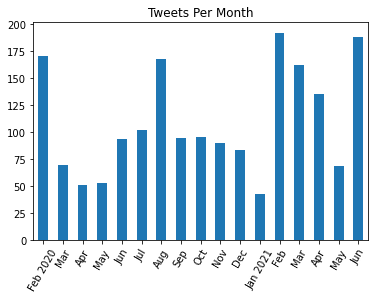

In [43]:
ax = (tweets_per_month.loc[:, ["month", 'count']]
                      .plot
                      .bar(x='month', 
                           title = "Tweets Per Month", 
                           legend=False));

months = ('Feb 2020', "Mar", "Apr", 'May', "Jun", "Jul", 'Aug', "Sep", "Oct", "Nov", "Dec", "Jan 2021", "Feb", "Mar", 'Apr', 'May', 'Jun')
positions = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)


plt.xticks(positions, months, rotation=60);
plt.xlabel("");

ax.figure.savefig('plots/tweets_per_month.png');

### Tweets By Day

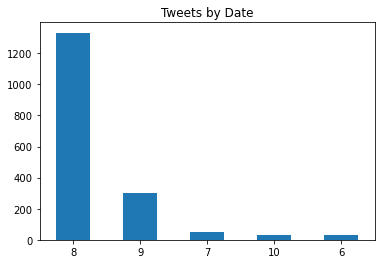

In [21]:
tweets_per_day = df_full.groupby('day').count().sort_values('month', ascending=False).reset_index()
ax2=tweets_per_day.head(5).plot.bar(x='day',
                                y='date',
                                title="Tweets by Date",
                                legend=None)
plt.xticks(rotation='horizontal')
plt.xlabel("");
ax2.figure.savefig('plots/tweets_by_date.png')

### Retweets per Month

In [22]:
retweets_per_month = df_full.groupby(['year','month'])['retweetCount'].sum().reset_index()
#Fill in the frequency table so there aren't blank cells
retweets_per_month = pd.DataFrame(retweets_per_month)
retweets_per_month.columns = ['year', 'month', 'count']

In [23]:
retweets_per_month

,year,month,count
0,2020,2,526
1,2020,3,175
2,2020,4,113
3,2020,5,130
4,2020,6,223
5,2020,7,280
6,2020,8,395
7,2020,9,200
8,2020,10,223
9,2020,11,146


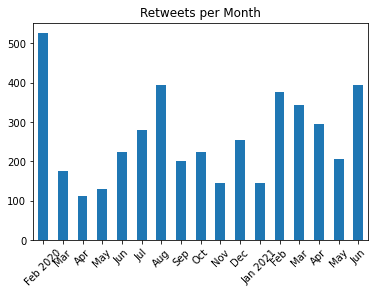

In [24]:
ax3 = (retweets_per_month.loc[:, ['month', 'count']]
                         .plot
                         .bar(x='month',
                              legend=False,
                              title="Retweets per Month"))

plt.xticks(positions, months, rotation=45);
plt.xlabel("");

ax3.figure.savefig('plots/retweets_per_month.png')

## Favorites Per Month

In [25]:
retweets_per_month = df_full.groupby(['year','month'])['retweetCount'].sum().reset_index()
#Fill in the frequency table so there aren't blank cells
retweets_per_month = pd.DataFrame(retweets_per_month)
retweets_per_month.columns = ['year', 'month', 'count']

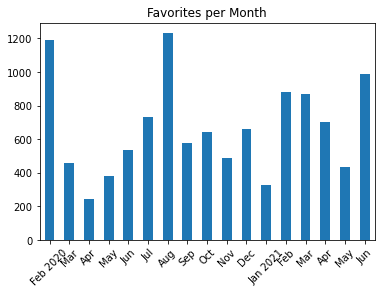

In [26]:
favorites_per_month = df_full.groupby(['year','month'])['likeCount'].sum().sort_index(ascending=True)
ax4 = favorites_per_month.plot.bar(title='Favorites per Month')
plt.xticks(positions, months, rotation=45);
plt.xlabel("");
ax4.figure.savefig('plots/favorites_per_month.png')

## Unique Users per Month

In [27]:
uniques_per_month = df_full.groupby([df_full['date'].dt.year.rename('year'), df_full['date'].dt.month.rename('month')])['username'].nunique().rename('count')
uniques_per_month = pd.DataFrame(uniques_per_month).reset_index()
uniques_per_month

,year,month,count
0,2020,2,92
1,2020,3,38
2,2020,4,27
3,2020,5,31
4,2020,6,54
5,2020,7,59
6,2020,8,71
7,2020,9,49
8,2020,10,47
9,2020,11,37


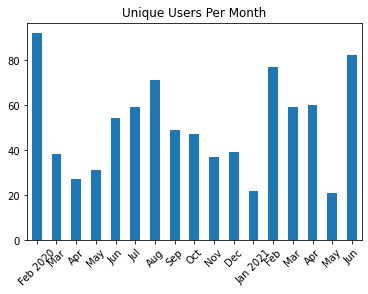

In [28]:
ax5 = (uniques_per_month.loc[:, ["month", 'count']]
                        .plot
                        .bar(x='month', 
                             title = "Unique Users Per Month", 
                             legend=False));

plt.xticks(positions, months, rotation=45);
plt.xlabel("");
ax5.figure.savefig('plots/uniques_per_month.png')

## Participants by Country

In [29]:
table = df_full.groupby(['year','month','country']).size().reset_index(name="counts")
table['total'] = table.groupby(['country'])['counts'].cumsum()
table['country'] = table.country.replace("PolandSerbia", "Poland")

In [30]:
table_wide = table.pivot(index=['year', 'month'], columns=['country'], values=['total']).fillna(method='ffill', axis=0).reset_index()
table_wide.fillna(0, inplace=True)

In [31]:
table_wide.reset_index()

index  year month     total                                      \
country                   Australia Canada Ecuador France Germany India   
0           0  2020     2       5.0    5.0     0.0    0.0     1.0   0.0   
1           1  2020     3       5.0    5.0     1.0    0.0     1.0   0.0   
2           2  2020     4       6.0    5.0     1.0    0.0     1.0   0.0   
3           3  2020     5       6.0    6.0     1.0    0.0     1.0   1.0   
4           4  2020     6       6.0    7.0     1.0    0.0     2.0   2.0   
5           5  2020     7       6.0    9.0     1.0    2.0     4.0   2.0   
6           6  2020     8       6.0   20.0     1.0    2.0     4.0   2.0   
7           7  2020     9       6.0   24.0     1.0    2.0     4.0   2.0   
8           8  2020    10       6.0   24.0     1.0    2.0     4.0   2.0   
9           9  2020    11       6.0   31.0     1.0    2.0     4.0   2.0   
10         10  2020    12       6.0   37.0     1.0    2.0     6.0   2.0   
11         11  2021     1       6.0   38.0     1.0    2.0     6.0   2.0   
12         12  2021     2       6.0   50.0     1.0    2.0     6.0   2.0   
13         13  2021     3       6.0   57.0     1.0    2.0     6.0   3.0   
14         14  2021     4       6.0   64.0     1.0    2.0     7.0   3.0   
15         15  2021     5       6.0   69.0     1.0    2.0     7.0   3.0   
16         16  2021     6       6.0   73.0     1.0    2.0     8.0   3.0   

                 ...                                                      \
country Ireland  ... New Zealand Nigeria Poland South Korea Spain Sweden   
0           0.0  ...         3.0     0.0    0.0         0.0   0.0    0.0   
1           0.0  ...         3.0     0.0    0.0         0.0   0.0    0.0   
2           0.0  ...         3.0     0.0    0.0         0.0   0.0    0.0   
3           0.0  ...         4.0     0.0    0.0         0.0   0.0    0.0   
4           0.0  ...         4.0     3.0    0.0         0.0   0.0    0.0   
5           0.0  ...         5.0     4.0    2.0         0.0   5.0    0.0   
6           0.0  ...         5.0     4.0    4.0         0.0   5.0    2.0   
7           0.0  ...         5.0     4.0    4.0         0.0   7.0    2.0   
8           0.0  ...         5.0     4.0    4.0         0.0  11.0    2.0   
9           0.0  ...         5.0     4.0    4.0         0.0  11.0    2.0   
10          0.0  ...         5.0     4.0    4.0         0.0  11.0    2.0   
11          0.0  ...         5.0     4.0    4.0         0.0  11.0    2.0   
12          0.0  ...         5.0     4.0    4.0        13.0  11.0    2.0   
13          3.0  ...         5.0     4.0    4.0        17.0  11.0    2.0   
14         11.0  ...         5.0     4.0    4.0        25.0  11.0    2.0   
15         12.0  ...         5.0     5.0    4.0        25.0  11.0    2.0   
16         14.0  ...         5.0     5.0    4.0        29.0  12.0    2.0   

                                                                   
country United Arab Emirates United Kingdom United States Vanuatu  
0                        0.0           13.0          74.0     0.0  
1                        0.0           20.0         111.0     0.0  
2                        0.0           24.0         136.0     0.0  
3                        0.0           33.0         163.0     0.0  
4                        0.0           47.0         208.0     0.0  
5                        0.0           57.0         247.0     0.0  
6                        3.0           60.0         338.0     1.0  
7                        3.0           69.0         383.0     2.0  
8                        3.0           77.0         409.0     2.0  
9                        3.0           97.0         448.0     2.0  
10                       3.0          110.0         480.0     2.0  
11                       3.0          118.0         488.0     2.0  
12                       3.0          125.0         564.0     2.0  
13                       3.0          135.0         652.0     2.0  
14                       3.0          148.0      

In [32]:
original_names = table_wide.columns
_ , country_names = zip(*original_names)
table_wide.columns = country_names

In [33]:
table_wide = pd.concat([table_wide]*2)
table_wide.sort_index(inplace=True)

In [34]:
table_wide.columns

Index(['', '', 'Australia', 'Canada', 'Ecuador', 'France', 'Germany', 'India',
       'Ireland', 'Italy', 'Malaysia', 'New Zealand', 'Nigeria', 'Poland',
       'South Korea', 'Spain', 'Sweden', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Vanuatu'],
      dtype='object')

In [35]:
table_wide.columns.values[[0, 1]] = ['year', 'month']

In [36]:
table_wide

,year,month,Australia,Canada,Ecuador,France,Germany,India,Ireland,Italy,...,New Zealand,Nigeria,Poland,South Korea,Spain,Sweden,United Arab Emirates,United Kingdom,United States,Vanuatu
0,2020,2,5.0,5.0,0.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,74.0,0.0
0,2020,2,5.0,5.0,0.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,74.0,0.0
1,2020,3,5.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,111.0,0.0
1,2020,3,5.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,111.0,0.0
2,2020,4,6.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,136.0,0.0
2,2020,4,6.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,136.0,0.0
3,2020,5,6.0,6.0,1.0,0.0,1.0,1.0,0.0,6.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,163.0,0.0
3,2020,5,6.0,6.0,1.0,0.0,1.0,1.0,0.0,6.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,163.0,0.0
4,2020,6,6.0,7.0,1.0,0.0,2.0,2.0,0.0,6.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,47.0,208.0,0.0
4,2020,6,6.0,7.0,1.0,0.0,2.0,2.0,0.0,6.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,47.0,208.0,0.0


In [37]:
mon_num = list(range(1,13))
mon_names = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

months_dic = dict(zip(mon_num, mon_names))
# df['col1'].replace(di, inplace=True)
table_wide['month'] = table_wide['month'].replace(months_dic)
table_wide

,year,month,Australia,Canada,Ecuador,France,Germany,India,Ireland,Italy,...,New Zealand,Nigeria,Poland,South Korea,Spain,Sweden,United Arab Emirates,United Kingdom,United States,Vanuatu
0,2020,February,5.0,5.0,0.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,74.0,0.0
0,2020,February,5.0,5.0,0.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,74.0,0.0
1,2020,March,5.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,111.0,0.0
1,2020,March,5.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,111.0,0.0
2,2020,April,6.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,136.0,0.0
2,2020,April,6.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,136.0,0.0
3,2020,May,6.0,6.0,1.0,0.0,1.0,1.0,0.0,6.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,163.0,0.0
3,2020,May,6.0,6.0,1.0,0.0,1.0,1.0,0.0,6.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,163.0,0.0
4,2020,June,6.0,7.0,1.0,0.0,2.0,2.0,0.0,6.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,47.0,208.0,0.0
4,2020,June,6.0,7.0,1.0,0.0,2.0,2.0,0.0,6.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,47.0,208.0,0.0


In [38]:
table_wide['month_year'] = table_wide['month']+" "+table_wide['year'].astype(str)
table_wide = table_wide.drop(columns=['month', 'year'])

In [39]:
table_wide.set_index('month_year')

,Australia,Canada,Ecuador,France,Germany,India,Ireland,Italy,Malaysia,New Zealand,Nigeria,Poland,South Korea,Spain,Sweden,United Arab Emirates,United Kingdom,United States,Vanuatu
month_year,,,,,,,,,,,,,,,,,,,
February 2020,5.0,5.0,0.0,0.0,1.0,0.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,74.0,0.0
February 2020,5.0,5.0,0.0,0.0,1.0,0.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,74.0,0.0
March 2020,5.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,111.0,0.0
March 2020,5.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,111.0,0.0
April 2020,6.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,136.0,0.0
April 2020,6.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,136.0,0.0
May 2020,6.0,6.0,1.0,0.0,1.0,1.0,0.0,6.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,163.0,0.0
May 2020,6.0,6.0,1.0,0.0,1.0,1.0,0.0,6.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,163.0,0.0
June 2020,6.0,7.0,1.0,0.0,2.0,2.0,0.0,6.0,1.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,47.0,208.0,0.0


In [41]:
# bcr.bar_chart_race(table_wide)

In [50]:
table_wide.columns
# df.query('col1 <= 1 & 1 <= col1')

Index(['Australia', 'Canada', 'Ecuador', 'France', 'Germany', 'India',
       'Ireland', 'Italy', 'Malaysia', 'New Zealand', 'Nigeria', 'Poland',
       'South Korea', 'Spain', 'Sweden', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Vanuatu', 'month_year'],
      dtype='object')

In [51]:
df_full.query('year == 2021 & month > 5')

,url_x,date,content,renderedContent,id_x,user,outlinks,tcooutlinks,replyCount,retweetCount,...,url_y,verified,geotext,city,country,name,iso3,year,month,day
1,https://twitter.com/realnealveglio/status/1402...,2021-06-10 12:15:25+00:00,"@JamesBurtt @Podchaser Keep it up, Mr Burtt! @...","@JamesBurtt @Podchaser Keep it up, Mr Burtt! @...",1402962603358498829,"{'username': 'realnealveglio', 'displayname': ...",[],[],0,0,...,https://twitter.com/realnealveglio,False,<geotext.geotext.GeoText object at 0x7f4bdcca4...,Oxford,United Kingdom,United Kingdom,GBR,2021,6,10
2,https://twitter.com/talkin_shiz/status/1402953...,2021-06-10 11:41:01+00:00,If you looking for a great podcast check us ou...,If you looking for a great podcast check us ou...,1402953946050842628,"{'username': 'talkin_shiz', 'displayname': 'Ta...",['https://www.podchaser.com/podcasts/talkin-sh...,['https://t.co/xbbHiiYmJF'],0,0,...,https://twitter.com/talkin_shiz,False,<geotext.geotext.GeoText object at 0x7f4bdcca4...,NaN,United States,United States,USA,2021,6,10
3,https://twitter.com/WomenOnMic/status/14027447...,2021-06-09 21:49:56+00:00,Huge thank you to @stephfuccio for sharing the...,Huge thank you to @stephfuccio for sharing the...,1402744798650376193,"{'username': 'WomenOnMic', 'displayname': 'Wom...",[],[],2,4,...,https://twitter.com/WomenOnMic,False,<geotext.geotext.GeoText object at 0x7f4bdcca4...,NaN,NaN,NaN,NaN,2021,6,9
4,https://twitter.com/LsceP/status/1402734266597...,2021-06-09 21:08:05+00:00,A little belated for #PodRevDay but Check out ...,A little belated for #PodRevDay but Check out ...,1402734266597974018,"{'username': 'LsceP', 'displayname': 'I Saw It...",['https://www.podchaser.com/podcasts/dads-on-d...,['https://t.co/3pnbdGms2O'],0,0,...,https://twitter.com/LsceP,False,<geotext.geotext.GeoText object at 0x7f4bdcca4...,Normal,United States,United States,USA,2021,6,9
6,https://twitter.com/greenhorizonpod/status/140...,2021-06-09 11:48:29+00:00,It's #PodRevDay &amp; why not celebrate by thr...,It's #PodRevDay &amp; why not celebrate by thr...,1402593438898532356,"{'username': 'greenhorizonpod', 'displayname':...",['https://www.podchaser.com/podcasts/the-green...,['https://t.co/vFhNhYDvp9'],0,5,...,https://twitter.com/greenhorizonpod,False,<geotext.geotext.GeoText object at 0x7f4bdcc2a...,NaN,NaN,NaN,NaN,2021,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,https://twitter.com/DimensionPod/status/140200...,2021-06-07 20:52:40+00:00,Anyone else excited for a Pride month #PodRevD...,Anyone else excited for a Pride month #PodRevD...,1402005612829954055,"{'username': 'DimensionPod', 'displayname': 'D...",['https://twitter.com/PodRevDay/status/1401987...,['https://t.co/aZWrUlnJUe'],2,3,...,https://twitter.com/DimensionPod,False,<geotext.geotext.GeoText object at 0x7f4bdcc64...,NaN,NaN,NaN,NaN,2021,6,7
209,https://twitter.com/Alistair_Pitts/status/1401...,2021-06-07 20:27:16+00:00,@PodRevDay @intlpodcastday @podcastbrunch @Ear...,@PodRevDay @intlpodcastday @podcastbrunch @Ear...,1401999221637722115,"{'username': 'Alistair_Pitts', 'displayname': ...",[],[],1,0,...,https://twitter.com/Alistair_Pitts,False,<geotext.geotext.GeoText object at 0x7f4bdcbe5...,Milton Keynes,United Kingdom,United Kingdom,GBR,2021,6,7
210,https://twitter.com/musciguy/status/1401993527...,2021-06-07 20:04:39+00:00,@PodRevDay @intlpodcastday @podcastbrunch @Ear...,@PodRevDay @intlpodcastday @podcastbrunch @Ear...,1401993527777763341,"{'username': 'musciguy', 'displayname': 'Garre...",['https://youtu.be/DYuvAN_K_0U'],['https://t.co/RzFpRJrFPp'],0,1,...,https://twitter.com/musciguy,False,<geotext.geotext.GeoText object at 0x7f4bdcc64...,Phoenix,United States,United States,USA,2021,6,7
212,https://twitter.com/need_3_mugs/status/1401845...,2021-06-07 10:16:27+00:00,"Don't forget, it's #podrevday tomorrow! Get yo...","Don't forget, it's #podrevday tomorrow! Get yo...",1401845502908547072,"{'username': 'need_3_mugs', 'displayname': 'No...",[],[